# Librairy

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping


# Data

In [9]:
data = pd.read_csv('../data/train.csv')
labels = data['label'].values
pixels = data.drop('label', axis=1).values

In [10]:
pixels = pixels / 255.0
pixels = pixels.reshape(-1, 28, 28, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

Taille de l'ensemble d'entraînement : (33600, 28, 28, 1)
Taille de l'ensemble de test : (8400, 28, 28, 1)


In [12]:
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

# Model

In [13]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

2024-07-31 08:46:47.459720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-31 08:46:47.459845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-31 08:46:47.459910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-07-31 08:46:47.459966: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-07-31 08:46:47.460020: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [18]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
945/945 [==============================] - 11s 11ms/step - loss: 0.1835 - accuracy: 0.9426 - val_loss: 0.0795 - val_accuracy: 0.9771
Epoch 2/50
945/945 [==============================] - 10s 10ms/step - loss: 0.0575 - accuracy: 0.9817 - val_loss: 0.0862 - val_accuracy: 0.9705
Epoch 3/50
945/945 [==============================] - 10s 10ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0547 - val_accuracy: 0.9830
Epoch 4/50
945/945 [==============================] - 10s 10ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0482 - val_accuracy: 0.9878
Epoch 5/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0488 - val_accuracy: 0.9854
Epoch 6/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0349 - val_accuracy: 0.9902
Epoch 7/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0383 - val_accuracy:

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

263/263 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.9893
Test accuracy: 0.9892857074737549


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

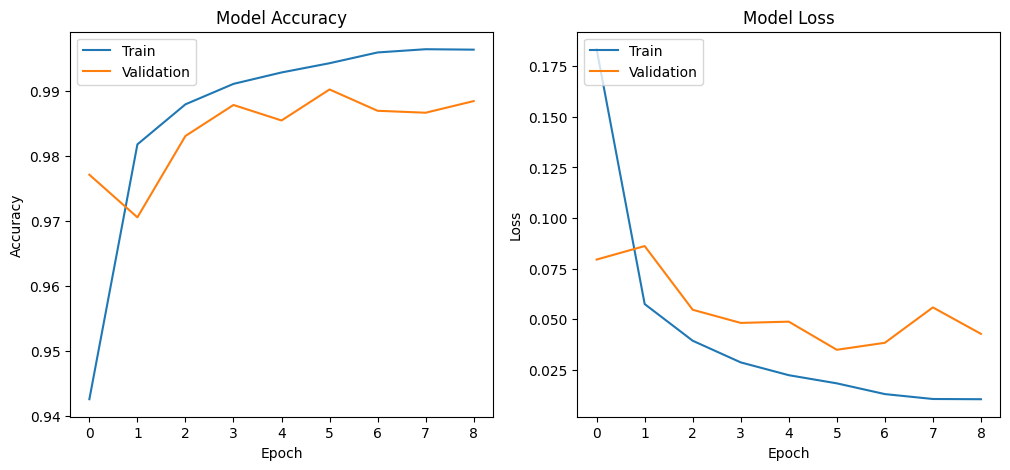

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# save H5

In [ ]:
model.save('model.h5')